## Computing Fundamental Transition of CO under different levels of approximation
We will illustrate approximations to the vibrational transition energies, specifically the fundamental ($n=0 \rightarrow n=1$) transition, using the diatomic molecule CO.  

We will use the Morse potential as a model for the "exact" interatomic potential, and we will approximate this potential by different orders of a Taylor expansion: including up to quadratic (which is the harmonic oscillator approximation), cubic, and quartic terms.  The harmonic and Morse potentials are exactly solvable, and the eigenfunctions and eigenvalues of the vibrational Hamiltonian with cubic and quartic potentials can be approximated using perturbation theory.  Therefore, we will
compare the fundamental  transition computed exactly for harmonic and Morse potentials, and approximately at 2nd order of perturbation theory for cubic and quartic potentials to see the impact of various levels of potential truncation and approximation.


Within the Morse model, the vibrational Hamiltonian can be written as
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{Morse}(r), \tag{1}
\end{equation}
where
\begin{equation}
V_{Morse}(r) = D_e \left(1 - e^{-\beta(r-r_{eq})} \right)^2. \tag{2}
\end{equation}

The Morse parameters for ${\rm CO}$ are as follows: $D_e = 11.225 \: {\rm eV}$, $r_{eq} = 1.1283 \: {\rm Ang.}$, $\beta = 2.5944 \: {\rm Ang.}^{-1}$,
and $\mu = 6.8606 \: {\rm amu}$.

The exact energy eigenvalues for Equation (1) can be written as
\begin{equation}
E_n = \hbar \omega \left( \left(n+ \frac{1}{2} \right) - \chi_e \left(n+ \frac{1}{2} \right)^2 \right) \tag{3}
\end{equation}
where
\begin{equation}
\omega = \sqrt{\frac{2D_e \beta^2}{\mu}} \tag{4}
\end{equation}
and
\begin{equation}
\chi_e = \frac{\hbar \omega}{4 D_e}. \tag{5}
\end{equation}

The Morse potential can be approximated by a Taylor expansion as follows:
\begin{equation}
V_T(r) = \sum_{n=0}^{\infty} \frac{ f^{(n)}(r_{eq})}{n!} \left(r-r_{eq} \right)^n, \tag{6}
\end{equation}
where $f^{(n)}(r_{eq})$ is the $n^{th}$-order derivative of the Morse potential evaluated at the equilibrium bondlength, e.g. $f^{(1)}(r_{eq}) = \frac{d}{dr}V_{Morse}(r_{eq}).$

We will define the Harmonic approximation to the potential as
\begin{equation}
V_H(r) =  \frac{ f^{''}(r_{eq})}{2} \left(r-r_{eq} \right)^2 = \frac{1}{2} k \left(r-r_{eq} \right)^2 \tag{7}
\end{equation}
the cubic approximation to the potential as
\begin{equation}
V_C(r) =  V_H(r) + \frac{ f^{'''}(r_{eq})}{6} \left(r-r_{eq} \right)^3 = V_H(r) + \frac{1}{6} g \left(r-r_{eq} \right)^3,   \tag{8}
\end{equation}
and the quartic approximation as
\begin{equation}
V_Q(r) =  V_C(r) + \frac{ f^{''''}(r_{eq})}{24} \left(r-r_{eq} \right)^4 =  V_C(r) + \frac{1}{24}h(r-r_{eq})^4.  \tag{9}
\end{equation}

Because we are using the Morse model as the "exact" interatomic potential in this notebook, we can compute these derivatives at $r_{eq}$ analytically:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3 \tag{10} \\
h = 14 D_e \beta^4.
\end{align}
However, in general we do not have an analytical form for the interatomic potential, so we must rely on numerical derivatives of the potential evaluated at the $r_{eq}$.  In the context of interatomic potentials computed by quantum chemistry methods (e.g. CCSD(T)), one must first identify the equilibrium geometry, and then compute derivatives by taking a number of single point calculations along all displacement coordinates to compute differences among.  We will write the explicit expression for the second derivative using centered finite differences along the one displacement coordinate relevant for our ${\rm CO}$ molecule:
\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+\mathcal O (\Delta r^2) \tag{11}
\end{equation}
where $\Delta r$ represents a small displacement along the coordinate $r$.  Higher-order derivatives can also be computed, but will require larger numbers of displacements and therefore more energy evaluations by your quantum chemistry method.  Expressions for higher-order derivatives along a single coordinate can be found [here](https://sameradeeb.srv.ualberta.ca/introduction-to-numerical-analysis/numerical-differentiation/#centred-finite-difference9). Note that the number of displacement coordinates $N$ grows linearly with the number of atoms, and that the number of displacements required to form the $n^{{\rm th}}$-order approximation to the potential grows as $N^n$.

### Perturbation Theory
We can compute the exact vibrational transition energies for the Morse oscillator and the Harmonic oscillator using Equation (3), where the Harmonic oscillator transition energies come from Equation (3) with $\chi_e = 0$.  However, the transition energies when the potential is approximated as $V_C(r)$ or $V_Q(r)$ must be approximated.  We will illustrate the use of Perturbation Theory approximate these transition energies.  

Here we will consider the Hamiltonian
\begin{equation}
\hat{H}_{vib} = -\frac{\hbar^2}{2\mu} \frac{d^2}{dr^2} + V_{H}(r) + V'(r) = \hat{H}_0 + V'(r) \tag{12},
\end{equation}
where $\hat{H}_0$ is exactly solved by the Harmonic oscillator energy eigenfunctions and eigenvalues ($\psi^{(0)}_n(r)$, $E^{(0)}_n$), and $V'(r)$ is the perturbation which will take the form of either
$V'(r) = \frac{1}{6}g(r-r_{eq})^3$ or $V'(r) = \frac{1}{6}g(r-r_{eq})^3 + \frac{1}{24}h(r-r_{eq})^4$ in the cubic and quartic approximations, respectively.

We can calculate the energy of state $n$ at 2nd order of perturbation theory as follows:
\begin{equation}
E_n = E_n^{(0)} +  \langle \psi_n^{(0)} | V'(r) | \psi_n^{(0)} \rangle + \sum_{k \neq n} \frac{|\langle \psi_k^{(0)} | V'(r) | \psi_n^{(0)}|^2}{E_n^{(0)}-E_k^{(0)}}. \tag{13}
\end{equation}

Recall that for the zeroth-order functions have the form
\begin{align}
\psi_n^{(0)}(r) &= \sqrt{\frac{1}{2^n n!}} \cdot \left(\frac{\alpha}{\pi} \right)^{1/4} \cdot H_n \left(\sqrt{\alpha} r \right) \cdot {\rm exp}\left(\frac{-\alpha }{2} r^2 \right) \\
\alpha &= \frac{\mu \omega}{\hbar} \\
\omega &= \sqrt{\frac{k}{\mu}}
\end{align}

### Approach
We will compute the fundamental transition ($E_1 - E_0$) using the following approaches:
1. Harmonic approximation: $E_1 - E_0 = \hbar \omega$
2. Exact solution for Morse Hamiltonian: $E_1 - E_0 = \hbar \omega (1 - 2\chi_e)$
3. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic contribution for $V'(r)$
4. Evaluation of Eq. (13) for $n=0$ and $n=1$ utilizing the cubic and quartic contribution for $V'(r)$


### Setting up Morse Oscillator Parameters
The following block will establish the parameters for $\hat{H}_{vib}$ with the Morse potential for the CO molecule.

In [347]:
# library imports for the entire notebook
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from numpy import trapz
from scipy.special import hermite
from math import factorial

# dissociation energy in eV
De_eV = 5.8931

# equilibrium bondlength in Angstroms
r_eq_ang = 0.91680

mF = 18.99
mH = 1.008

# reduced mass in amu
mu_amu = (mF*mH)/(mF + mH)

# potential curvature in inverse angstromgs
#need to double check this!!! def not right
beta_inv_ang = 0.3596
print(mu_amu)

0.9571917191719173


### Unit conversion
We will use atomic units for our calculations and convert to spectroscopic units later.  In the following block, we will store different conversion factors as variables for later use.  

In [342]:
# atomic mass units to kg
amu_to_kg = 1.66054e-27

# angstroms to meters
ang_to_m = 1e-10

# electron volts to Jouls
eV_to_J = 1.60218e-19

# electron volts to atomic units of energy (Hartrees)
eV_to_au = 1 / 27.211 #0.0367493

# angstroms to atomic units of length (Bohr radii)
au_to_ang = 0.52917721067121

# atomic mass units to atomic units of mass
amu_to_au = 1822.89


The fllowing block will use the conversion factors above to store the Morse oscillator parameters in atomic units.

In [345]:

# dissociation energy in au
De_au = De_eV * eV_to_au

# reduced mass in SI
mu_au = mu_amu * amu_to_au

# equilibrium bondlength in SI
r_eq_au = r_eq_ang / au_to_ang

# beta in SI
beta_au = beta_inv_ang * au_to_ang

# hbar in SI
hbar_au = 1

# h in SI
h_SI = np.pi * 2


### Evaluating the Morse potential in atomic units
Here we will create an numpy array of bondlength values between $0$ and $2.5 r_{eq}$

(0.0, 1.0)

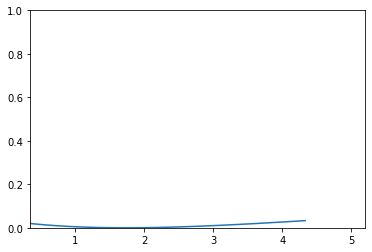

In [59]:
def evaluate_Morse(r, De, beta, r_eq):
    """ Helper function to evaluate the Morse potential at a given value of r

    Arguments
    ---------
    r : float
        value(s) of r to evaluate potential at

    De : float
        dissociation energy of the Morse oscillator

    beta : float
        related to the curvature of the Morse oscillator

    r_eq : float
        equilibrium bondlength of the Morse oscillator

    Returns
    -------
    V_m : float
        value of the Morse potential at value(s) of r

    """
    # <== inert code to compute Morse Oscillator potential and store to V_M
    V_M = De * (1 - np.exp(-beta * (r - r_eq)))**2
    return V_M


# array of bondlength values
r = np.linspace(0.2, 2.5 * r_eq_au, 500)

# array of Morse potential values
V_Morse = evaluate_Morse(r, De_au, beta_au, r_eq_au)

plt.plot(r, V_Morse)
plt.xlim(0.2*r_eq_au, 3*r_eq_au)
plt.ylim(0,1)

### Expanding the Morse potential as a Taylor series
In the following block, we will compute the analytical $k$, $g$, and $h$ terms defined in Equation 10.  We will compare the value of $k$ computed analytically to the value computed numerically by Eq. (11), as well.

Recall Equation (10) was:
\begin{align}
k = 2 D_e \beta^2 \\
g = -6 D_e \beta^3  \\
h = 14 D_e \beta^4.
\end{align}

and (11) was:

\begin{equation}
k=\frac{V_{Morse}(r_{eq}+\Delta r)-2V_{Morse}(r_{eq})+V_{Morse}(r_{eq}-\Delta r)}{\Delta r^2}+O (\Delta r^2)
\end{equation}

In [5]:
#not using here
# Insert analytical evaluation of k
# ,== k =
k = 2 * De_au * beta_au**2
# Insert analytical evaluation of g
# <== g =
g = -6 * De_au * beta_au**3
# analytical evalution of h
# <== h =
h = 14 * De_au * beta_au**4
# numerical evaluation of k

# small displacement along r
delta_r = 0.001 * r_eq_au

# value of Morse potential at forward displacement
# <== V_f =
V_f = evaluate_Morse(r_eq_au + delta_r, De_au, beta_au, r_eq_au)
# value of Morse potential at equilibrium
#<== V_eq
V_eq = evaluate_Morse(r_eq_au, De_au, beta_au, r_eq_au)
# value of Morse potential at backward displacement
# <== V_b =
V_b = evaluate_Morse(r_eq_au - delta_r, De_au, beta_au, r_eq_au)
# CFD approximation to k
# <== k_num =
k_num = (V_f - 2 * V_eq + V_b) / (delta_r**2)
# compare the numerical and analytic evaluation of k
print(k_num, k)
if np.isclose(k, k_num):
    print(" The numerical and analytical values for k agree to within +/- 0.0001 atomic units.")


0.0156845102812818 0.015684509286847146
 The numerical and analytical values for k agree to within +/- 0.0001 atomic units.


Next we will evaluate the Harmonic, cubic, and quartic models for the interatomic potential and plot all against the Morse potential.

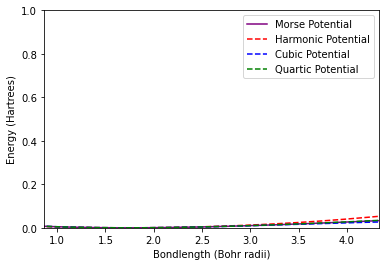

In [6]:
#not using here
# Harmonic potential
V_H = 1/2 * k * (r -r_eq_au) ** 2

# cubic
V_C = V_H + 1/6 * g * (r - r_eq_au) ** 3

# quartic
V_Q = V_C + 1/24 * h * (r - r_eq_au) ** 4

plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.plot(r, V_C, 'b--', label="Cubic Potential")
plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.5 * r_eq_au, 2.5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

### Compute $E_1$ and $E_2$ using Perturbation Theory
We will need access to the zeroth-order states $\psi_n^{(0)}(r)$ to compute the 1st and 2nd order energy corrections.
The following helper functions will give us access to these states and will also perform the operations necessary to compute the perturbative corrections.

In [1]:
# library imports for the entire notebook
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
from numpy import trapz
from scipy.special import hermite
from math import factorial
import psi4
def compute_alpha(k, mu, hbar):
    """ Helper function to compute \alpha = \sqrt{/mu * \omega / \hbar}

    Arguments
    ---------
    k : float
        the Harmonic force constant

    mu : float
        the reduced mass

    hbar : float
        reduced planck's constant

    Returns
    -------
    alpha : float
        \alpha = \sqrt{k * \omega / \hbar}

    """
    # compute omega
    # <== omega =
    omega = np.sqrt(k/mu)
    # compute alpha
    # <== alpha
    alpha = mu*omega/hbar
    # return alpha
    return alpha

def N(n, alpha):
    """ Helper function to take the quantum number n of the Harmonic Oscillator and return the normalization constant

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    Returns
    -------
    N_n : float
        the normalization constant
    """

    return  np.sqrt( 1 / (2 ** n * factorial(n)) ) * ( alpha / np.pi ) ** (1/4)

def psi(n, alpha, r, r_eq):
    """ Helper function to evaluate the Harmonic Oscillator energy eigenfunction for state n

    Arguments
    ---------
    n : int
        the quantum state of the harmonic oscillator

    alpha : float
        alpha value


    r : float
        position at which psi_n will be evaluated

    r_eq : float
        equilibrium bondlength

    Returns
    -------
    psi_n : float
        value of the harmonic oscillator energy eigenfunction

    """

    Hr = hermite(n)

    psi_n = N(n, alpha) * Hr( np.sqrt(alpha) * ( r - r_eq )) * np.exp( -0.5 * alpha  * (r - r_eq)**2)

    return psi_n

def harmonic_eigenvalue(n, k, mu, hbar):
    """ Helper function to evaluate the energy eigenvalue of the harmonic oscillator for state n"""

    return hbar * np.sqrt(k/mu) * (n + 1/2)

def morse_eigenvalue(n, k, mu, De, hbar):
    """ Helper function to evaluate the energy eigenvalue of the Morse oscillator for state n"""

    omega = np.sqrt( k / mu )
    xi = hbar * omega / (4 * De)

    return hbar * omega * ( (n + 1/2) - xi * (n + 1/2) ** 2)

def potential_matrix_element(n, m, alpha, r, r_eq, V_p):
    """ Helper function to compute <n|V_p|m> where V_p is the perturbing potential

    Arguments
    ---------
    n : int
        quantum number of the bra state

    m : int
        quantum number of the ket state

    alpha : float
        alpha constant for bra/ket states

    r : float
        position grid for bra/ket states

    r_eq : float
        equilibrium bondlength for bra/ket states

    V_p : float
        potential array

    Returns
    -------
    V_nm : float
        <n | V_p | m >

    """
    # bra
    psi_n = psi(n, alpha, r, r_eq)

    # ket
    psi_m = psi(m, alpha, r, r_eq)

    # integrand
    integrand = np.conj(psi_n) * V_p * psi_m

    # integrate
    V_nm = np.trapz(integrand, r)

    return V_nm

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/5f/ftf5xlgj4dv_6xxqh_p9pwyc0000gq/T/ipykernel_56938/2211028031.py:10: SyntaxWarning: invalid escape sequence '\s'
  """ Helper function to compute \alpha = \sqrt{/mu * \omega / \hbar}


# Test out the eigenfunctions
Here we will plot $\psi_0^{(0)}$ against the Harmonic potential and will also test to make sure it is properly normalized.

0.9999996239793363


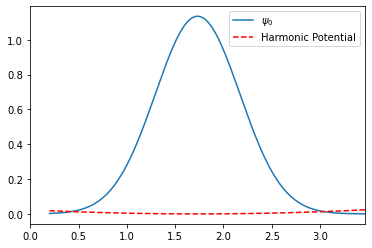

In [61]:
# compute alpha
alpha = compute_alpha(k, mu_au, hbar_au)

# compute psi_0 along the r grid
psi_0 =psi(0, alpha, r, r_eq_au)

# is it normalized?
Integral = trapz(psi_0 ** 2, r)

print(Integral)
assert np.isclose(Integral, 1.0)


# Harmonic potential
plt.plot(r, psi_0, label='$\psi_0$')
plt.plot(r, V_H, 'r--', label="Harmonic Potential")
plt.xlim(0, 2 * r_eq_au)
plt.legend()
plt.show()

# Compute the fundamental transition energies
Now we will compute the fundamental transition energies at all levels of theory and plot the results in both atomic units and in wavenumbers.

In [10]:
#not using here
# fundamental transition energy at HO level
fundamental_HO = harmonic_eigenvalue(1, k, mu_au, hbar_au) - harmonic_eigenvalue(0, k, mu_au, hbar_au)

# fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k, mu_au, De_au, hbar_au) - morse_eigenvalue(0, k, mu_au, De_au, hbar_au)

# 1st order correction using the cubic potential
pt1_cubic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_C - V_H))

# 1st order correction using the quartic potential
pt1_quartic = potential_matrix_element(0, 0, alpha, r, r_eq_au, (V_Q - V_H))

# 2nd order corrections using cubic and quartic potentials
pt2_cubic = 0
pt2_quartic = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k, mu_au, hbar_au)
    Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_C - V_H))
    pt2_cubic += Vc_j0 ** 2 / (fundamental_HO - E_j)
    Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_au, (V_Q - V_H))
    pt2_quartic += Vq_j0 ** 2 / (fundamental_HO - E_j)



/tmp/ipykernel_30/322103682.py:21: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
/tmp/ipykernel_30/322103682.py:22: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
/tmp/ipykernel_30/322103682.py:23: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
/tmp/ipykernel_30/322103682.py:24: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become ke

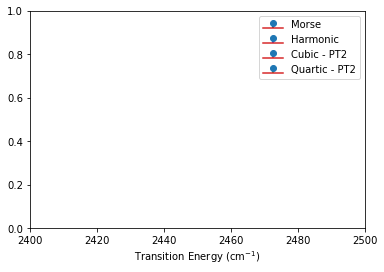

Morse 655.9182595630539
HO 660.5075114036747
cubic 657.5824475861216
quartic 658.5772866225601


In [12]:
#not using
import matplotlib.pyplot as plt

cubic_fo = fundamental_HO + pt1_cubic
quartic_fo = fundamental_HO + pt1_quartic

cubic_so = cubic_fo + pt2_cubic
quartic_so = quartic_fo + pt2_quartic

au_to_wn = 219474.63068

morse_plot = np.array([fundamental_Morse * au_to_wn, 1.0])
HO_plot = np.array([fundamental_HO * au_to_wn, 1.0])
cubic_so_plot = np.array([cubic_so * au_to_wn, 1.0])
quartic_so_plot = np.array([quartic_so * au_to_wn, 1.0])






plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
plt.stem(quartic_so_plot[0], quartic_so_plot[1], "green", label="Quartic - PT2")
plt.xlim(2400, 2500)
plt.ylim(0, 1)
plt.xlabel("Transition Energy (cm$^{-1}$)")
plt.legend()
plt.show()


print('Morse', morse_plot[0])
print('HO', HO_plot[0])
print('cubic', cubic_so_plot[0])
print('quartic', quartic_so_plot[0])

Create and fit Morse potential in atomic units

Now plot the potential and compute some eigenvalues

In [62]:
import psi4
mol_tmpl = """
H
F 1 0.955581
symmetry c2v
"""

options_dict = {
    "basis": "cc-pVTZ",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

#make psi4 aware of the options (basis set, convergence criteria)
psi4.set_options(options_dict)

#make psi4 aware of the geometry
mol = psi4.geometry(mol_tmpl)
energy = psi4.optimize('ccsd(t)')

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/
gradient() will perform analytic gradient computation.

*** tstart() called on 0216ab9ca79b
*** at Tue Apr 23 21:04:38 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    23 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry F          line   300 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, mul

In [63]:
r_eq_ccsd = 0.916076
error_r_eq = r_eq_ccsd - r_eq_ang
per_error_r_eq = error_r_eq / r_eq_ang *100
print('%error', per_error_r_eq)

%error -0.07897033158812686


In [21]:
#not using

import psi4 
mol_tmpl = """
H
F 1 **R**
symmetry c2v
"""
#atom 1: C, atom 2: O, the 1 is specifying the atom C and the **R** represents the distance between O and C

r_angstrom = np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
options_dict = {
    "basis": "cc-pVTZ",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

psi4.set_options(options_dict)
#mol = psi4.geometry(mol_tmpl)

#ccsdt_e = psi4.energy('ccsd')

ccsdt_energy = []

for r_val in r_angstrom:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd(t)')
    ccsdt_energy.append(ccsdt_e)



Scratch directory: /tmp/

*** tstart() called on ab8438b576e6
*** at Wed Apr 10 15:43:50 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    23 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry F          line   300 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   ----

In [24]:
#not using
V_min_ccsdt = np.min(ccsdt_energy)
print(V_min_ccsdt)



-100.35104255167387


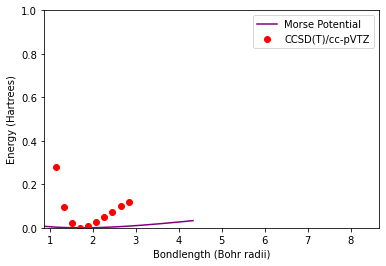

In [28]:
#not using
plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r_angstrom / au_to_ang, ccsdt_energy-V_min_ccsdt, 'ro', label="CCSD(T)/cc-pVTZ")
#plt.plot(r, V_H, 'r--', label="Harmonic Potential")
#plt.plot(r, V_C, 'b--', label="Cubic Potential")
#plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.5 * r_eq_au, 5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()


# Assignment
1. Locate the equilibrium bondlength at the CCSD/cc-pVTZ level and report it in Angstroms and Bohr units.  Report the error and percentage error compared to the $R_{eq}$ used in the Morse potential.

|  &nbsp; | r_eq | error | % error|
|:----:|:----:|:----:|:----:|
| Morse(bohr) | 2.132 | N/A | N/A |
| Ang | 1.128 | 0.0065 | 0.575
| Bohr | 2.144 | 0.012 | 0.575|



2. Utilize second-order schemes for [finite differences](https://www.mech.kth.se/~ardeshir/courses/literature/fd.pdf) to approximate $k$, $g$, and $h$ at the CCSD/cc-pVTZ level and report these in atomic units.  **Hint** Make sure your displacements are in atomic units!  Report the error and percentage error compared to these values that were derived from the Morse potential.

| &nbsp; | value | error | % error |
|:---:|:---:|:---:|:---:|
| k| 1.22 | 0.339 | 21.73 |
| g | -4.519 | 1.923 | 29.92 |
| h | 14.148 | 6.52 | 31.57 |

3. Build a quartic potential model for CO using coefficients $k$, $g$, and $h$ derived from the previous step.  Plot the Harmonic, Cubic, Quartic components along with the raw CCSD/cc-pVTZ data and the original Morse potential.

4. Compute the fundamental transition energy from CO using the quartic potential and 2nd-order perturbation theory.  Make a table that includes the fundamental computed using this approximation, the fundamental from the Morse model, and the experimental value for the CO fundamental.  Include a column for the percentage error of both approximations relative to the experimental value.

|&nbsp; | value | % error |
|:---:|:---:|:---:|
|quartic ccsdt| 2143.33 | 0.047|
| Morse model| 2418.87 | 6.65|
| exp value | 4143.23 | &nbsp;|

In [27]:
#1 equilibrium bondlength
#not using

r_fine_au = np.linspace(0.70,1.5,10)
r_fine_ang = r_fine_au * au_to_ang

ccsdt_nrg = []

for r_val in r_fine_ang:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd(t)')
    ccsdt_nrg.append(ccsdt_e)


V_minn_ccsdt = np.min(ccsdt_nrg)


Scratch directory: /tmp/

*** tstart() called on ed12069e2cfb
*** at Fri Apr  5 15:50:16 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    23 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry F          line   300 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Center              X                  Y                   Z               Mass       
    ------------   ----

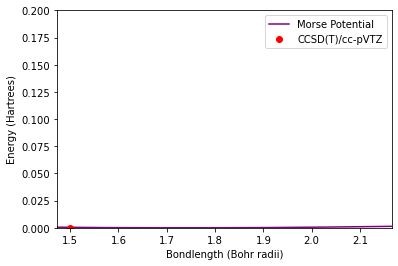

1.1444444444444444
error -0.5880564673713309
%error -33.94263537529738
r_eq_ang 0.9168
error_ang -0.3111860811207263
%error_ang -33.94263537529738
morse 1.7325009118157753


In [37]:
#not using
plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r_fine_au, ccsdt_nrg-V_minn_ccsdt, 'ro', label="CCSD(T)/cc-pVTZ")
#plt.plot(r, V_H, 'r--', label="Harmonic Potential")
#plt.plot(r, V_C, 'b--', label="Cubic Potential")
#plt.plot(r, V_Q, 'g--', label="Quartic Potential")
plt.xlim(0.85 * r_eq_au, 1.25 * r_eq_au)
plt.ylim(0, 0.2)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

r_eq_ccsdt_au = r_fine_au[5]
print(r_eq_ccsdt_au)

# %error:
error = r_eq_ccsdt_au - r_eq_au
per_error = error / r_eq_au * 100
print('error', error)
print('%error', per_error)

r_eq_ccsdt_ang = r_eq_ccsdt_au *au_to_ang
r_eq_ang = r_eq_au * au_to_ang
error_ang = r_eq_ccsdt_ang - r_eq_ang
per_error_ang = error_ang / r_eq_ang * 100
print('r_eq_ang', r_eq_ang)
print('error_ang', error_ang)
print('%error_ang', per_error_ang)
print('morse', r_eq_au)

In [14]:
print(r_eq_ccsdt_ang)
print(dr_au)
print(sec_nrg)
print(sec_order_displ_ang)
print(fourth_nrg)
print(mol_tmpl)

0.916076
0.009448630627267536
[-100.34974564624706, -100.34974564624257, -100.34974564624389]
[0.921076 0.916076 0.911076]
[-100.34974564624422, -100.34974564624422, -100.34974564624422, -100.34974564624422, -100.34974564624422]

H
F 1 0.955581
symmetry c2v



In [12]:
import psi4

#2
r_eq_ccsdt_ang = r_eq_ccsd 

dr_ang = 0.005
dr_au = dr_ang/au_to_ang

sec_order_displ_ang = np.array([r_eq_ccsdt_ang+dr_ang, r_eq_ccsdt_ang, r_eq_ccsdt_ang-dr_ang])
third_order_displ_ang = np.array([r_eq_ccsdt_ang+2*dr_ang, r_eq_ccsdt_ang+dr_ang, r_eq_ccsdt_ang-dr_ang, r_eq_ccsdt_ang-2*dr_ang])
fourth_order_displ_ang = np.array([r_eq_ccsdt_ang+2*dr_ang, r_eq_ccsdt_ang+dr_ang, r_eq_ccsdt_ang, r_eq_ccsdt_ang-dr_ang, r_eq_ccsdt_ang-2*dr_ang])

sec_nrg = []
third_nrg = []
fourth_nrg = []


#k_finite --> eq 19
for r_val in sec_order_displ_ang:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd(t)')
    sec_nrg.append(ccsdt_e)

#g_finite --> eq 21 
for r_val in third_order_displ_ang:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd(t)')
    third_nrg.append(ccsdt_e)

#h_finite --> eq 23
for r_val in fourth_order_displ_ang:
    mol_str = mol_tmpl.replace("**R**", str(r_val))
    mol = psi4.geometry(mol_str)
    ccsdt_e = psi4.energy('ccsd(t)')
    fourth_nrg.append(ccsdt_e)


H
F 1 0.955581
symmetry c2v

	Removing binary optimization data file.
	Cleaning optimization helper files.

Scratch directory: /tmp/

*** tstart() called on 3f1fcf158605
*** at Fri Apr 19 14:06:04 2024

   => Loading Basis Set <=

    Name: CC-PVTZ
    Role: ORBITAL
    Keyword: BASIS
    atoms 1 entry H          line    23 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 
    atoms 2 entry F          line   300 file /usr/local/psi4/share/psi4/basis/cc-pvtz.gbs 


         ---------------------------------------------------------
                                   SCF
               by Justin Turney, Rob Parrish, Andy Simmonett
                          and Daniel G. A. Smith
                              RHF Reference
                        1 Threads,    500 MiB Core
         ---------------------------------------------------------

  ==> Geometry <==

    Molecular point group: c2v
    Full point group: C_inf_v

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

       Ce

In [15]:
print(sec_nrg)

[-100.34974564624706, -100.34974564624257, -100.34974564624389]


In [13]:
k_ccsdt_1 = (sec_nrg[0]-2*sec_nrg[1]+sec_nrg[2]) / (dr_au)**2
print('k_ccsdt:', k_ccsdt)


g_ccsdt_1 = (third_nrg[0]-2*third_nrg[1]+2*third_nrg[2]-third_nrg[3]) / (2*(dr_au**3))
print('g_ccsdt:', g_ccsdt)



h_ccsdt_1 = (fourth_nrg[0]-4*fourth_nrg[1]+6*fourth_nrg[2]-4*fourth_nrg[3]+fourth_nrg[4]) / (dr_au)**4
print('h_ccsdt:', h_ccsdt)




k_ccsdt: -6.510371395060515e-08
g_ccsdt: 1.6846651223822775e-08
h_ccsdt: 1.7829727807546528e-06


In [ ]:
#not using
plt.plot(r, V_Morse, 'purple', label="Morse Potential")
plt.plot(r_angstrom / au_to_ang, ccsdt_energy-V_min_ccsdt, 'ro', label="CCSD(T)/cc-pVTZ")
plt.plot(r, V_H_ccsdt, 'r--', label="Harmonic Potential")
plt.plot(r, V_C_ccsdt, 'b--', label="Cubic Potential")
plt.plot(r, V_Q_ccsdt, 'g--', label="Quartic Potential")
plt.xlim(0.2 * r_eq_au, 5 * r_eq_au)
plt.ylim(0, 1)
plt.xlabel("Bondlength (Bohr radii)")
plt.ylabel("Energy (Hartrees)")
plt.legend()
plt.show()

/tmp/ipykernel_30/3238088008.py:51: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
/tmp/ipykernel_30/3238088008.py:52: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
/tmp/ipykernel_30/3238088008.py:53: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
/tmp/ipykernel_30/3238088008.py:54: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will becom

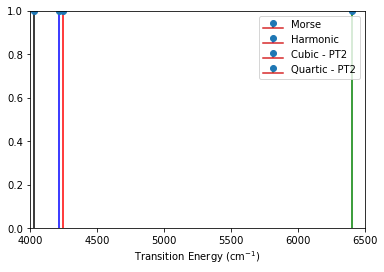

Morse 4024.8578333298974
HO 4211.429381108825
cubic 4243.765087716661
quartic 6403.077424308559


In [17]:
# not using
r_eq_ccsdt_au = r_eq_ccsd / au_to_ang


# fundamental transition energy at HO level
fundamental_HO = harmonic_eigenvalue(1, k_ccsdt, mu_au, hbar_au) - harmonic_eigenvalue(0, k_ccsdt, mu_au, hbar_au)

# fundamental transition energy at Morse level
fundamental_Morse = morse_eigenvalue(1, k_ccsdt, mu_au, De_au, hbar_au) - morse_eigenvalue(0, k_ccsdt, mu_au, De_au, hbar_au)

# 1st order correction using the cubic potential
pt1_cubic_ccsdt = potential_matrix_element(0, 0, alpha, r, r_eq_ccsdt_au, (V_C_ccsdt - V_H_ccsdt))

# 1st order correction using the quartic potential
pt1_quartic_ccsdt = potential_matrix_element(0, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))

# 2nd order corrections using cubic and quartic potentials
pt2_cubic_ccsdt = 0
pt2_quartic_ccsdt = 0

# sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
    Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_C_ccsdt - V_H_ccsdt))
    pt2_cubic_ccsdt += Vc_j0 ** 2 / (fundamental_HO - E_j)
    Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
    pt2_quartic_ccsdt += Vq_j0 ** 2 / (fundamental_HO - E_j)

    
    

cubic_fo = fundamental_HO + pt1_cubic_ccsdt
quartic_fo = fundamental_HO + pt1_quartic_ccsdt

cubic_so = cubic_fo + pt2_cubic
quartic_so = quartic_fo + pt2_quartic

au_to_wn = 219474.63068

morse_plot = np.array([fundamental_Morse * au_to_wn, 1.0])
HO_plot = np.array([fundamental_HO * au_to_wn, 1.0])
cubic_so_plot = np.array([cubic_so * au_to_wn, 1.0])
quartic_so_plot = np.array([quartic_so * au_to_wn, 1.0])






plt.stem(morse_plot[0], morse_plot[1], "black", label="Morse")
plt.stem(HO_plot[0], HO_plot[1], "blue", label="Harmonic")
plt.stem(cubic_so_plot[0], cubic_so_plot[1], "red", label="Cubic - PT2")
plt.stem(quartic_so_plot[0], quartic_so_plot[1], "green", label="Quartic - PT2")
plt.xlim(4000, 6500)
plt.ylim(0, 1)
plt.xlabel("Transition Energy (cm$^{-1}$)")
plt.legend()
plt.show()


print('Morse', morse_plot[0])
print('HO', HO_plot[0])
print('cubic', cubic_so_plot[0])
print('quartic', quartic_so_plot[0])

In [33]:
#wrong not using
error_MO = morse_plot[0]-3961
per_e = error_MO/3961 * 100
print('morse',per_e)

#error in fundamental
quartic = 6403.077424308559
error_FO = np.abs(quartic-3961)
per_error_FO = error_FO/3961*100
print('quartic',per_error_FO)

morse 1.6121644365033427
quartic 61.65305287322794


In [ ]:
#wrong not using
#sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    if j!=0:
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vc_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_C_ccsdt - V_H_ccsdt))
        pt2_cubic_ccsdt += Vc_j0 ** 2 / (fundamental_HO - E_j)
        Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        pt2_quartic_ccsdt += Vq_j0 ** 2 / (fundamental_HO - E_j)
    if j!=1:
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vc_j1 = potential_matrix_element(j, 1, alpha, r, r_eq_ccsdt_au, (V_C_ccsdt - V_H_ccsdt))
        pt2_cubic_ccsdt += Vc_j1 ** 2 / (fundamental_HO - E_j)
        Vq_j1 = potential_matrix_element(j, 1, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        pt2_quartic_ccsdt += Vq_j1 ** 2 / (fundamental_HO - E_j)
    if j!=3:
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vc_j3 = potential_matrix_element(j, 3, alpha, r, r_eq_ccsdt_au, (V_C_ccsdt - V_H_ccsdt))
        pt2_cubic_ccsdt += Vc_j3 ** 2 / (fundamental_HO - E_j)
        Vq_j3 = potential_matrix_element(j, 3, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        pt2_quartic_ccsdt += Vq_j3 ** 2 / (fundamental_HO - E_j)

In [8]:
k_ccsdt = 0.6376383941056603
g_ccsdt = -2.4576269811768907
h_ccsdt  = 8.551848862638836
# angstroms to atomic units of length (Bohr radii)
au_to_ang = 0.52917721067121

mF = 18.99
mH = 1.008

# reduced mass in amu
mu_amu = (mF*mH)/(mF + mH)

# atomic mass units to atomic units of mass
amu_to_au = 1822.89

mu_au = mu_amu * amu_to_au
# array of bondlength values
r_eq_ccsd = 0.916041
r_eq_au  =r_eq_ccsd / au_to_ang
r_eq_ccsdt_au = r_eq_au
r = np.linspace(0.2, 2.5 * r_eq_au, 500)
r_angstrom= np.array([0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
#3
# Harmonic potential
V_H_ccsdt = 1/2 * k_ccsdt * (r -r_eq_au) ** 2

# cubic
V_C_ccsdt = V_H_ccsdt + 1/6 * g_ccsdt * (r - r_eq_au) ** 3

# quartic
V_Q_ccsdt = V_C_ccsdt + 1/24 * h_ccsdt * (r - r_eq_au) ** 4

alpha = mu_au * np.sqrt(k_ccsdt/mu_au)

In [9]:
hbar_au = 1
E0_0th = harmonic_eigenvalue(0, k_ccsdt, mu_au, hbar_au)
E1_0th = harmonic_eigenvalue(1, k_ccsdt, mu_au, hbar_au)
E3_0th = harmonic_eigenvalue(3, k_ccsdt, mu_au, hbar_au)

E0_1st = potential_matrix_element(0, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E1_1st = potential_matrix_element(1, 1, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E3_1st = potential_matrix_element(3, 3, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))

In [10]:
# define 0th order energies for states 0, 1, and 3 for the fundamental and first overtone calculations
E_0_harmoinc = harmonic_eigenvalue(0, k_ccsdt, mu_au, hbar_au)
E_1_harmonic = harmonic_eigenvalue(1, k_ccsdt, mu_au, hbar_au)
E_3_harmonic = harmonic_eigenvalue(3, k_ccsdt, mu_au, hbar_au)
# initiatize 2nd order correction to energies for states 0, 1, and 3
E_0_pt2 = 0
E_1_pt2 = 0
E_3_pt2 = 0
#sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    if j!=0:
        # add contribution for 2nd order correction to state 0
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_0_pt2 += Vq_j0 ** 2 / (E_0_harmoinc - E_j)
    if j!=1:
        # add contribution for 2nd order correction to state 1
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j1 = potential_matrix_element(j, 1, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_1_pt2 += Vq_j1 ** 2 / (E_1_harmonic - E_j)
    if j!=3:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j3 = potential_matrix_element(j, 3, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_3_pt2 += Vq_j3 ** 2 / (E_3_harmonic - E_j)


In [11]:
print(E0_0th)
print(E_0_harmoinc)

0.00955823131183085
0.00955823131183085


In [12]:
E0_true = E0_0th + E0_1st + E_0_pt2
E1_true = E1_0th + E1_1st + E_1_pt2
E3_true = E3_0th + E3_1st + E_3_pt2

print('E0:', E0_true)
print('E1:', E1_true)
print('E3:', E3_true)

E0: 0.00945916824891961
E1: 0.027400090812476706
E3: 0.060829742987561136


In [14]:
# atomic units to wavenumbers
au_to_wn = 219474.63068
fund_over_au = E1_true - E0_true
fund_wn = fund_over_au * au_to_wn
print('fund_wn:', fund_wn)

sec_over_au = E3_true - E0_true
sec_over_wn = sec_over_au * au_to_wn
print('2nd over wn:', sec_over_wn)

fund_wn: 3937.5773536951724
2nd over wn: 11274.537918582686


In [15]:
fund_trans_exp_cm = 3961.641
sec_over_exp_cm = 11372.88

In [16]:
# error in fundamental
error_fund = np.abs(fund_wn - fund_trans_exp_cm)
per_error_fund = error_fund / fund_trans_exp_cm *100
print(per_error_fund)

0.6074161264190185


In [17]:
# error in second overtone

error_sec = np.abs(sec_over_wn - sec_over_exp_cm)
per_error_sec = error_sec / sec_over_exp_cm *100
print(per_error_sec)

0.864706929267813


In [18]:
# work to get beta

print('k cssdt:',k_ccsdt)
print('De:',De_eV)
De_J = De_eV *eV_to_J
print('De_J:', De_J)
beta_au_ccsdt = np.sqrt( k_ccsdt / (2*De_J))
beta_in_ang = beta_au_ccsdt * au_to_ang
print('beta_in_ang:',beta_in_ang)
print('beta_au_ccsdt:',beta_au_ccsdt)


k cssdt: 0.6376383941056603


NameError: name 'De_eV' is not defined

In [74]:
beta_w = -g_ccsdt_1 / (3*k_ccsdt_1)
De_w = k_ccsdt_1/(2*beta_w**2)

print(beta_w)
print(De_w)

1.2847548097768446
0.19315411246534323


In [75]:
hbar = 1
omega_w = np.sqrt(2*De_w*beta_w**2 / (mu_amu*amu_to_au))
print(omega_w)
xe = hbar*omega_w / (4*De_w)
print(xe)

0.019188684214027467
0.024835976787020788


## building the hamiltonian

In [19]:
omega = np.sqrt(k_ccsdt /mu_au)
print(omega)

0.0191164626236617


In [20]:
# define 0th order energies for states 0, 1, and 3 for the fundamental and first overtone calculations
E_0_harmonic = harmonic_eigenvalue(0, k_ccsdt, mu_au, hbar_au)
E_1_harmonic = harmonic_eigenvalue(1, k_ccsdt, mu_au, hbar_au)
E_3_harmonic = harmonic_eigenvalue(3, k_ccsdt, mu_au, hbar_au)
E_4_harmonic = harmonic_eigenvalue(4, k_ccsdt, mu_au, hbar_au)
E_5_harmonic = harmonic_eigenvalue(5, k_ccsdt, mu_au, hbar_au)
E_6_harmonic = harmonic_eigenvalue(6, k_ccsdt, mu_au, hbar_au)
E_7_harmonic = harmonic_eigenvalue(7, k_ccsdt, mu_au, hbar_au)
E_8_harmonic = harmonic_eigenvalue(8, k_ccsdt, mu_au, hbar_au)
E_9_harmonic = harmonic_eigenvalue(9, k_ccsdt, mu_au, hbar_au)
E_10_harmonic = harmonic_eigenvalue(10, k_ccsdt, mu_au, hbar_au)
E_2_harmonic = harmonic_eigenvalue(2, k_ccsdt, mu_au, hbar_au)


E0_1st = potential_matrix_element(0, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E1_1st = potential_matrix_element(1, 1, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E3_1st = potential_matrix_element(3, 3, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E4_1st = potential_matrix_element(4, 4, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E5_1st = potential_matrix_element(5, 5, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E6_1st = potential_matrix_element(6, 6, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E7_1st = potential_matrix_element(7, 7, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E8_1st = potential_matrix_element(8, 8, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E9_1st = potential_matrix_element(9, 9, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E10_1st = potential_matrix_element(10, 10, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
E2_1st = potential_matrix_element(2, 2, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))

# initiatize 2nd order correction to energies for states 0, 1, and 3
E_0_pt2 = 0
E_1_pt2 = 0
E_3_pt2 = 0
E_4_pt2 = 0
E_5_pt2 = 0
E_6_pt2 = 0
E_7_pt2 = 0
E_8_pt2 = 0
E_9_pt2 = 0
E_10_pt2 = 0
E_2_pt2 = 0
#sum over |<j|V'|n>|^2/(Ej-En)
for j in range(1, 50):
    if j!=0:
        # add contribution for 2nd order correction to state 0
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j0 = potential_matrix_element(j, 0, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_0_pt2 += Vq_j0 ** 2 / (E_0_harmoinc - E_j)
    if j!=1:
        # add contribution for 2nd order correction to state 1
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j1 = potential_matrix_element(j, 1, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_1_pt2 += Vq_j1 ** 2 / (E_1_harmonic - E_j)
    if j!=3:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j3 = potential_matrix_element(j, 3, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_3_pt2 += Vq_j3 ** 2 / (E_3_harmonic - E_j)
    if j!=4:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j4 = potential_matrix_element(j, 4, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_4_pt2 += Vq_j4 ** 2 / (E_4_harmonic - E_j)
    if j!=5:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j5 = potential_matrix_element(j, 5, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_5_pt2 += Vq_j5 ** 2 / (E_5_harmonic - E_j)
    if j!=6:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j6 = potential_matrix_element(j, 6, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_6_pt2 += Vq_j6 ** 2 / (E_6_harmonic - E_j)
    if j!=7:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j7 = potential_matrix_element(j, 7, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_7_pt2 += Vq_j7 ** 2 / (E_7_harmonic - E_j)
    if j!=8:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j8 = potential_matrix_element(j, 8, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_8_pt2 += Vq_j8 ** 2 / (E_8_harmonic - E_j)
    if j!=9:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j9 = potential_matrix_element(j, 9, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_9_pt2 += Vq_j9 ** 2 / (E_9_harmonic - E_j)
    if j!=10:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j10 = potential_matrix_element(j, 10, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_10_pt2 += Vq_j10 ** 2 / (E_10_harmonic - E_j)
    if j!=2:
        # add contribution for 2nd order correction to state 3
        E_j = harmonic_eigenvalue(j, k_ccsdt, mu_au, hbar_au)
        Vq_j2 = potential_matrix_element(j, 2, alpha, r, r_eq_ccsdt_au, (V_Q_ccsdt - V_H_ccsdt))
        E_2_pt2 += Vq_j2 ** 2 / (E_2_harmonic - E_j)


In [21]:
E0 = E_0_harmonic + E0_1st + E_0_pt2
E1 = E_1_harmonic + E1_1st + E_1_pt2
E2 = E_2_harmonic + E2_1st + E_2_pt2
E3 = E_3_harmonic + E3_1st + E_3_pt2
E4 = E_4_harmonic + E4_1st + E_4_pt2
E5 = E_5_harmonic + E5_1st + E_5_pt2
E6 = E_6_harmonic + E6_1st + E_6_pt2
E7 = E_7_harmonic + E7_1st + E_7_pt2
E8 = E_8_harmonic + E8_1st + E_8_pt2
E9 = E_9_harmonic + E9_1st + E_9_pt2
E10 = E_10_harmonic + E10_1st + E_10_pt2

In [22]:
print(E0)

0.00945916824891961


In [23]:
E_array = np.array([E0, E1, E2, E3, E4, E5, E6, E7, E8, E9, E10])
print(E_array)

[0.00945917 0.02740009 0.04484292 0.06082974 0.07562895 0.08894444
 0.10069249 0.11073828 0.11894498 0.12517579 0.12929385]


In [24]:
import numpy as np
from numpy import linalg as la

def compute_matter_element(bra_nm, bra_np, ket_nm, ket_np, E_array):
    if bra_nm == ket_nm and bra_np == ket_np:
        return E_array[ket_nm]
    else:
        return 0
    
def compute_photon_matrix_element(bra_nm, bra_np, ket_nm, ket_np, omega_p):
    hbar = 1
    if bra_nm == ket_nm and bra_np == ket_np:
        return hbar * omega_p * (ket_np + 1/2)
    else:
        return 0
    
def compute_interaction_matrix_element(bra_nm, bra_np, ket_nm, ket_np, omega_p, mu, A0, z, k, E_array): 
    hbar = 1
    omega = E_array[1]-E_array[0]
    x0 = 1 / np.sqrt(2 * omega * mu)
    c0 = 1j * omega_p * z * A0 * x0
   
    if bra_nm == ket_nm+1 and bra_np == ket_np+1:
        return c0 * np.sqrt(ket_nm +1) * np.sqrt(ket_np +1)
    elif bra_nm == ket_nm+1 and bra_np == ket_np-1:
        return c0 * np.sqrt(ket_nm +1) *-np.sqrt(ket_np)
    elif bra_nm == ket_nm-1 and bra_np == ket_np+1:
        return c0 * np.sqrt(ket_nm) *np.sqrt(ket_np +1)
    elif bra_nm == ket_nm-1 and bra_np == ket_np-1:
        return c0 * np.sqrt(ket_nm)*-np.sqrt(ket_np)
    else:
        return 0
    
def compute_dipole_energy_element(bra_nm, bra_np, ket_nm, ket_np, z, A0, mu, k, omega_p, E_array):
    hbar = 1
    omega = E_array[1]-E_array[0]
    x0 = 1 / np.sqrt(2 * omega * mu)
    c1 = z**2 * A0**2 * omega_p * x0 ** 2 

        
    if bra_nm == ket_nm and bra_np == ket_np:
        return c1 * (2*ket_nm + 1)
    elif bra_nm == ket_nm+2 and bra_np == ket_np:
        return c1 *np.sqrt(ket_nm +1) * np.sqrt(ket_nm+2)
    elif bra_nm == ket_nm -2 and bra_np == ket_np:
        return c1 * np.sqrt(ket_nm) * np.sqrt(ket_nm -1)
    else:
        return 0
    
def build_and_diagonalize_d_dot_E(basis, omega_p, mu, A0, z, k, E_array):
    dim = len(basis[:,0])
    H_dE = np.zeros((dim,dim), dtype=complex)

    ket_idx = 0
    for ket in basis:
        bra_idx = 0
        for bra in basis:
            H_m_element = compute_matter_element(bra[0], bra[1], ket[0], ket[1], E_array)
            H_p_element = compute_photon_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p)
            H_i_element = compute_interaction_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p, mu, A0, z, k, E_array)
            H_m2_element = compute_dipole_energy_element(bra[0], bra[1], ket[0], ket[1], z, A0, mu, k, omega_p, E_array)
            
            H_dE[bra_idx, ket_idx] =  H_m_element +  H_p_element + H_i_element + H_m2_element
            bra_idx = bra_idx +1
        ket_idx = ket_idx +1
    
    vals, vecs = la.eigh(H_dE)
    return vals

In [25]:
basis_list = np.array([[0,0],[0,1],[0,2],[0,3],[0,4],[0,5],[0,6],[0,7],[0,8],[0,9],[0,10],
                        [1,0],[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9],[1,10],
                        [2,0],[2,1],[2,2],[2,3],[2,4],[2,5],[2,6],[2,7],[2,8],[2,9],[2,10],
                        [3,0],[3,1],[3,2],[3,3],[3,4],[3,5],[3,6],[3,7],[3,8],[3,9],[3,10],
                        [4,0],[4,1],[4,2],[4,3],[4,4],[4,5],[4,6],[4,7],[4,8],[4,9],[4,10],
                        [5,0],[5,1],[5,2],[5,3],[5,4],[5,5],[5,6],[5,7],[5,8],[5,9],[5,10],
                        [6,0],[6,1],[6,2],[6,3],[6,4],[6,5],[6,6],[6,7],[6,8],[6,9],[6,10],
                        [7,0],[7,1],[7,2],[7,3],[7,4],[7,5],[7,6],[7,7],[7,8],[7,9],[7,10],
                        [8,0],[8,1],[8,2],[8,3],[8,4],[8,5],[8,6],[8,7],[8,8],[8,9],[8,10],
                        [9,0],[9,1],[9,2],[9,3],[9,4],[9,5],[9,6],[9,7],[9,8],[9,9],[9,10],
                        [10,0],[10,1],[10,2],[10,3],[10,4],[10,5],[10,6],[10,7],[10,8],[10,9],[10,10]])



In [26]:
from morse import Morse, FAC


def build_basis(matter_dim, photon_dim):
    basis = []
    for i in range(photo_dim):
        for j in range(matter_dim):
            basis.append((j,i))
    return basis



## rabi spliting with Dr. foley's fundamental


In [31]:
basis_array = basis_list
print(len(basis_array))
#k_val = 1
#mu_val = 1
mu = mu_au
#z_val = 1
zcharge = -0.468
#omega_p = 3979.09 #cm^-1
omega_p_val = E_array[1]-E_array[0]
#A0_val = 0
A0 = 0.02
k = k_ccsdt


#H_pda = np.zeros((100,100), dtype=complex)
#print(H_pda)

            

dim = len(basis_array[:,0])
H_dE = np.zeros((dim,dim), dtype=complex)
#print(H_dE)

ket_idx = 0
for ket in basis_array:
    bra_idx = 0
    for bra in basis_array:
        H_m_element = compute_matter_element(bra[0], bra[1], ket[0], ket[1], E_array)
        H_p_element = compute_photon_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p_val)
        H_i_element = compute_interaction_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p_val, mu, A0, zcharge, k, E_array)
        H_m2_element = compute_dipole_energy_element(bra[0], bra[1], ket[0], ket[1], zcharge, A0, mu, k, omega_p_val, E_array)
        
        H_dE[bra_idx, ket_idx] = H_m_element + H_p_element + H_i_element + H_m2_element
        bra_idx = bra_idx + 1
    ket_idx = ket_idx + 1
    
    
print(np.real(H_dE))
print(len(H_dE))

#H_elements = []
#if 

#for element in H_dE:
  #  if element == 0
#print(bra[0])

121
[[0.01842965 0.         0.         ... 0.         0.         0.        ]
 [0.         0.03637058 0.         ... 0.         0.         0.        ]
 [0.         0.         0.0543115  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.28179222 0.         0.        ]
 [0.         0.         0.         ... 0.         0.29973315 0.        ]
 [0.         0.         0.         ... 0.         0.         0.31767407]]
121


In [32]:
print(H_i_element)  
print(H_m_element)
print(H_p_element)

0
0.12929385478490588
0.1883796869173495


In [33]:
energies = build_and_diagonalize_d_dot_E(basis_array, omega_p_val, mu, A0, zcharge, k, E_array)
print(energies)
print(len(energies))

[0.01842964 0.03634935 0.0363918  0.05381165 0.05428242 0.05434236
 0.06979963 0.07175145 0.07221753 0.07229088 0.08459899 0.08774042
 0.08969124 0.09015371 0.09023832 0.0979146  0.10253981 0.10568121
 0.10763104 0.10809057 0.10818508 0.10966273 0.11585545 0.11970858
 0.12048063 0.123622   0.12557084 0.12602792 0.12613135 0.12760359
 0.12791534 0.13379631 0.13414617 0.13764945 0.13826452 0.13842145
 0.14156279 0.14351065 0.14396563 0.14407725 0.14554446 0.1458562
 0.15173716 0.15208704 0.15559032 0.15620532 0.15636226 0.15950358
 0.16145046 0.16190364 0.16202286 0.16348532 0.16379707 0.16967801
 0.1700279  0.17353118 0.17414612 0.17430308 0.17744437 0.17939027
 0.17984188 0.17996823 0.18142618 0.18173794 0.18761887 0.18796877
 0.19147205 0.19208692 0.1922439  0.19538516 0.19733008 0.1977804
 0.19791345 0.19936705 0.19967881 0.20555972 0.20590964 0.20941292
 0.21002772 0.21018472 0.21332595 0.21527023 0.21579761 0.21730791
 0.21761968 0.22350057 0.2238505  0.22735379 0.22796852 0.228125

In [34]:
r3 = energies[2]
r2 = energies[1]
RAbi = r3-r2
print(RAbi)

4.244568299328899e-05


In [599]:
A0_rabi = np.linspace(0, 0.1, 11)



e1 = []
e2 = []
e3 = []
e4 = []
e5 = []
e6 = []
e7 = []
e8 = []
e9 = []
e10 = []

for A in A0_rabi:
    energies = build_and_diagonalize_d_dot_E(basis_array, omega_p, mu, A, zcharge, k)
    e1.append(energies[0])
    e2.append(energies[1])
    e3.append(energies[2])
    e4.append(energies[3])
    e5.append(energies[4])
    e6.append(energies[5])
    e7.append(energies[6])
    e8.append(energies[7])
    e9.append(energies[8])
    e10.append(energies[9])


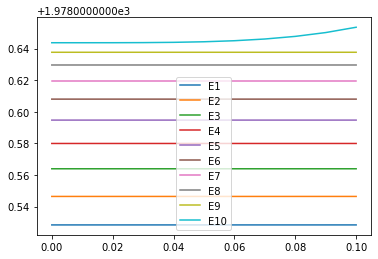

In [600]:
from matplotlib import pyplot as plt

plt.plot(A0_rabi, e1, label="E1")
plt.plot(A0_rabi, e2, label="E2")
plt.plot(A0_rabi, e3, label="E3")
plt.plot(A0_rabi, e4, label="E4")
plt.plot(A0_rabi, e5, label="E5")
plt.plot(A0_rabi, e6, label="E6")
plt.plot(A0_rabi, e7, label="E7")
plt.plot(A0_rabi, e8, label="E8")
plt.plot(A0_rabi, e9, label="E9")
plt.plot(A0_rabi, e10, label="E10")

plt.legend()
plt.show()

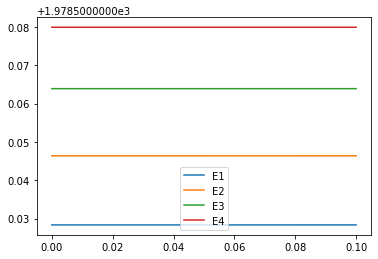

In [601]:
from matplotlib import pyplot as plt

plt.plot(A0_rabi, e1, label="E1")
plt.plot(A0_rabi, e2, label="E2")
plt.plot(A0_rabi, e3, label="E3")
plt.plot(A0_rabi, e4, label="E4")


plt.legend()
plt.show()

In [602]:


E1_r = e1[2]
E2_r = e2[2]
E3_r = e3[2]
E4_r = e4[2]
E5_r = e5[2]
E6_r = e6[2]
E7_r = e7[2]
E8_r = e8[2]
E9_r = e9[2]
E10_r = e10[2]

print(E1_r)
print(E2_r)
print(E3_r)
print(E4_r)
print(E5_r)
print(E6_r)
print(E7_r)
print(E8_r)
print(E9_r)
print(E10_r)

1978.5283492746407
1978.546378858651
1978.5638874936258
1978.5799051690622
1978.5947019916348
1978.6079788037912
1978.619651253543
1978.6295829963547
1978.6376356520145
1978.643686603243


In [603]:
rabi_12 = E2_r-E1_r
print(rabi_12)
rabi_23 = E3_r-E2_r
print(rabi_23)
rabi_34 = E4_r-E3_r
print(rabi_34)
rabi_45 = E5_r-E4_r
print(rabi_45)
rabi_56 = E6_r-E5_r
print(rabi_56)
rabi_67 = E7_r-E6_r
print(rabi_67)
rabi_78 = E8_r-E7_r
print(rabi_78)
rabi_89 = E9_r-E8_r
print(rabi_89)
rabi_910 = E10_r-E9_r
print(rabi_910)


0.018029584010264443
0.017508634974774395
0.016017675436387435
0.014796822572634483
0.013276812156391316
0.011672449751813474
0.009931742811659205
0.008052655659867014
0.006050951228417034


## Code for number 5

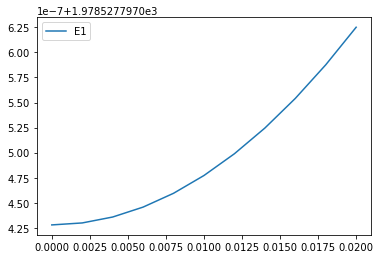

In [565]:
plt.plot(A0_rabi, e1, label="E1")
plt.legend()
plt.show()

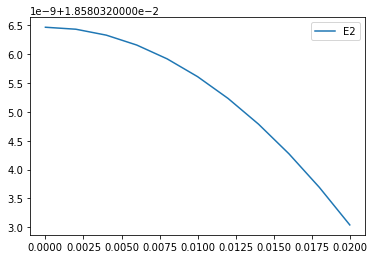

In [537]:
plt.plot(A0_rabi, e2, label="E2")
plt.legend()
plt.show()

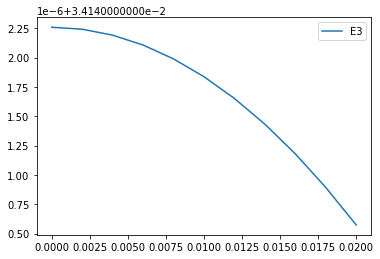

In [539]:
plt.plot(A0_rabi, e3, label="E3")
plt.legend()
plt.show()

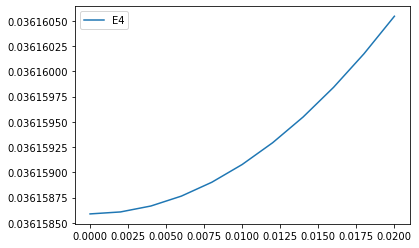

In [540]:
plt.plot(A0_rabi, e4, label="E4")
plt.legend()
plt.show()

In [561]:
basis_array = basis_list
print(len(basis_array))
#k_val = 1
#mu_val = 1
mu = mu_au
#z_val = 1
zcharge = 1
#omega_p = 3979.09 #cm^-1
omega_p = fund_wn #au
omega_p_val = omega_p
#A0_val = 0
A0 = 0
k = k_ccsdt


#H_pda = np.zeros((100,100), dtype=complex)
#print(H_pda)

            

dim = len(basis_array[:,0])
H_dE = np.zeros((dim,dim), dtype=complex)
#print(H_dE)

ket_idx = 0
for ket in basis_array:
    bra_idx = 0
    for bra in basis_array:
        H_m_element = compute_matter_element(bra[0], bra[1], ket[0], ket[1], E_array)
        H_p_element = compute_photon_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p_val)
        H_i_element = compute_interaction_matrix_element(bra[0], bra[1], ket[0], ket[1], omega_p_val, mu, A0, zcharge, k)
        H_m2_element = compute_dipole_energy_element(bra[0], bra[1], ket[0], ket[1], zcharge, A0, mu, k, omega_p_val)
        
        H_dE[bra_idx, ket_idx] = H_m_element + H_p_element + H_i_element + H_m2_element
        bra_idx = bra_idx + 1
    ket_idx = ket_idx + 1
    
    
print(np.real(H_dE))
print(len(H_dE))

#H_elements = []
#if 

#for element in H_dE:
  #  if element == 0
#print(bra[0])

121
[[ 1978.52834917     0.             0.         ...     0.
      0.             0.        ]
 [    0.          5935.56601685     0.         ...     0.
      0.             0.        ]
 [    0.             0.          9892.60368452 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... 33634.88896938
      0.             0.        ]
 [    0.             0.             0.         ...     0.
  37591.92663706     0.        ]
 [    0.             0.             0.         ...     0.
      0.         41548.96430474]]
121


In [562]:
energies = build_and_diagonalize_d_dot_E(basis_array, omega_p_val, mu, A0, zcharge, k)

In [563]:
A0_rabi = np.linspace(0, 0.02, 11)



e1 = []
e2 = []
e3 = []
e4 = []
e5 = []
e6 = []
e7 = []
e8 = []
e9 = []
e10 = []

for A in A0_rabi:
    energies = build_and_diagonalize_d_dot_E(basis_array, omega_p, mu, A, zcharge, k)
    e1.append(energies[0])
    e2.append(energies[1])
    e3.append(energies[2])
    e4.append(energies[3])
    e5.append(energies[4])
    e6.append(energies[5])
    e7.append(energies[6])
    e8.append(energies[7])
    e9.append(energies[8])
    e10.append(energies[9])

#print(energies)
#print(len(energies))

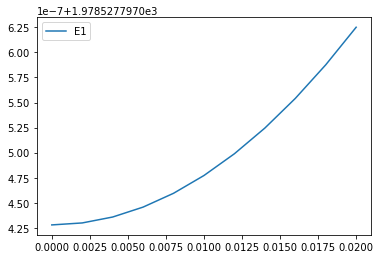

In [564]:
plt.plot(A0_rabi, e1, label="E1")
plt.legend()
plt.show()